# Plot article summaries

In [1]:
import pathlib

import matplotlib
import numpy
import pandas
import plotnine

/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Read and tidy yearly summaries

In [2]:
path = pathlib.Path('data/years.tsv')
year_df = pandas.read_table(path)
year_df.head(2)

year  author  number  unknown  n_articles
0  1979       4       4        0           8
1  1980      20       0        0          20

In [3]:
year_tidy_df = year_df.melt(id_vars=['year', 'n_articles'], var_name='cite_style', value_name='count')
year_tidy_df.cite_style = pandas.Categorical(year_tidy_df.cite_style, categories=['number', 'unknown', 'author'], ordered=True)
year_tidy_df.head(2)

year  n_articles cite_style  count
0  1979           8     author      4
1  1980          20     author     20

## Plotting parameters

In [4]:
# Plotnine figure dimensions
width, height = 4, 3
plotnine.options.figure_size = width, height

In [5]:
fill_colors = {
    'number': '#bac0f2',
    'unknown': '#e2e2e2',
    'author': '#edb4b4',
}

## Yearly plots

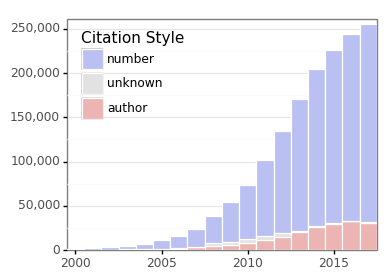

<ggplot: (8756593391785)>

In [6]:
comma_formatter = lambda array: ['{:,.0f}'.format(x) for x in array]

plot_absolute = (
    plotnine.ggplot(plotnine.aes(x='year', y='count', fill='cite_style'), data=year_tidy_df) +
    plotnine.geom_bar(stat='identity', color='white', width=1) +
    plotnine.scale_x_continuous(breaks=range(1000, 3000, 5), minor_breaks=[0]) +
    plotnine.scale_y_continuous(labels=comma_formatter) +
    plotnine.ylab('') +
    plotnine.coord_cartesian(xlim=(1999.5, 2017.5), ylim=(0, 1.02 * year_df.n_articles.max()), expand=False) +
    plotnine.scale_fill_manual(limits=list(fill_colors), values=list(fill_colors.values()), name='Citation Style') +
    plotnine.theme_bw() +
    plotnine.theme(
        legend_position=(0.29, 0.7),
        axis_title_x=plotnine.element_blank(),
        legend_background=plotnine.element_blank(),
        panel_grid_major_x=plotnine.element_blank(),
    )
)
plot_absolute

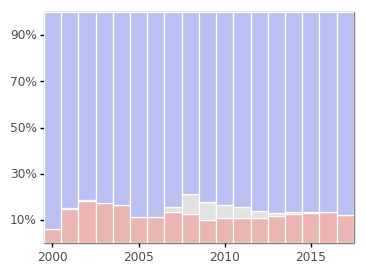

<ggplot: (8756593392027)>

In [7]:
percent_formatter = lambda array: ['{:,.0%}'.format(x) for x in array]
plot_normalized = (
    plotnine.ggplot(plotnine.aes(x='year', y='count', fill='cite_style'), data=year_tidy_df) +
    plotnine.geom_bar(stat='identity', position='fill', color='white', width=1) +
    plotnine.scale_x_continuous(breaks=range(1000, 3000, 5), minor_breaks=[0]) +
    plotnine.scale_y_continuous(labels=percent_formatter, breaks=numpy.arange(0.1, 0.95, 0.2)) +
    plotnine.ylab('') +
    plotnine.coord_cartesian(xlim=(1999.5, 2017.5), expand=False) +
    plotnine.scale_fill_manual(limits=list(fill_colors), values=list(fill_colors.values()), guide=False) +
    plotnine.theme_bw() +
    plotnine.theme(
        legend_position=(0.25, 0.7),
        axis_title_x=plotnine.element_blank(),
        legend_background=plotnine.element_blank(),
        panel_grid_major_x=plotnine.element_blank(),
    )
)

plot_normalized

In [8]:
plotnine.ggsave(plot_absolute, 'figure/years-absolute.svg', width=width, height=height)
plotnine.ggsave(plot_absolute, 'figure/years-absolute.png', width=width, height=height, dpi=300)

/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figure/years-absolute.svg
  warn('Filename: {}'.format(filename))
/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figure/years-absolute.png
  warn('Filename: {}'.format(filename))


In [9]:
plotnine.ggsave(plot_normalized, 'figure/years-normalized.svg', width=width, height=height)
plotnine.ggsave(plot_normalized, 'figure/years-normalized.png', width=width, height=height, dpi=300)

/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figure/years-normalized.svg
  warn('Filename: {}'.format(filename))
/home/dhimmel/anaconda3/envs/pmc-citation-styles/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figure/years-normalized.png
  warn('Filename: {}'.format(filename))


## Read data for all articles

In [10]:
path = pathlib.Path('data/article-cite-styles.tsv.gz')
article_df = pandas.read_table(path, dtype={'pmid': str})
article_df.head(2)

pmc      pmid                            doi  year  \
0  PMC4602280  26535109  10.12688/f1000research.4591.3  2014   
1  PMC1475402       NaN                            NaN  1974   

                             journal              nlm_journal      publisher  \
0                      F1000Research                 F1000Res  F1000Research   
1  Environmental Health Perspectives  Environ Health Perspect            NaN   

                                          filename  n_cites  n_number_cites  \
0                   F1000Res_2015_Oct_1_3_205.nxml       50              50   
1  Environ_Health_Perspect_1974_Dec_9_343-417.nxml        0               0   

   n_author_cites  n_unknown_cites mode_style  n_references  \
0               0                0     number            45   
1               0                0     number             0   

   n_reference_labels  
0                  45  
1                   0

## Acta Crystallographica

In [11]:
acta_df = article_df[article_df.nlm_journal.str.startswith('Acta Crystallogr', na=False)]
# Articles per Acta Crystallographica journal
acta_df.nlm_journal.value_counts()

Acta Crystallogr Sect E Struct Rep Online           23627
Acta Crystallogr E Crystallogr Commun                2095
Acta Crystallogr D Biol Crystallogr                   504
Acta Crystallogr Sect F Struct Biol Cryst Commun      242
Acta Crystallogr F Struct Biol Commun                 137
Acta Crystallogr D Struct Biol                        118
Acta Crystallogr B Struct Sci Cryst Eng Mater          43
Acta Crystallogr A Found Adv                           27
Acta Crystallogr A                                     19
Acta Crystallogr B                                     11
Acta Crystallogr C Struct Chem                          7
Acta Crystallogr C                                      5
Name: nlm_journal, dtype: int64

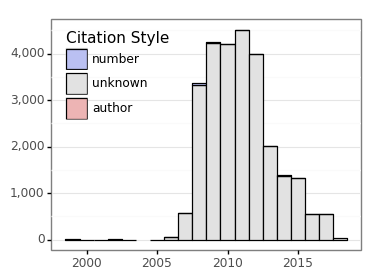

<ggplot: (8756557152625)>

In [12]:
(
    plotnine.ggplot(plotnine.aes(x='year', fill='mode_style'), data=acta_df) +
    plotnine.geom_bar(color='black', width=1) +
    plotnine.scale_x_continuous(breaks=range(1000, 3000, 5), minor_breaks=[0]) +
    plotnine.scale_y_continuous(labels=comma_formatter) +
    plotnine.ylab('') +
    plotnine.scale_fill_manual(limits=list(fill_colors), values=list(fill_colors.values()), name='Citation Style') +
    plotnine.theme_bw() +
    plotnine.theme(
        legend_position=(0.29, 0.7),
        axis_title_x=plotnine.element_blank(),
        legend_background=plotnine.element_blank(),
        panel_grid_major_x=plotnine.element_blank(),
    )
)